<a href="https://colab.research.google.com/github/Yatinkhunt/Ecommerce/blob/master/6_ZIDIO_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the yahoo finance library o downloading the data of stocks.
import yfinance as yf

# Impporting pandas library for performing the loading dataset
import pandas as pd

# Importing numpy library
import numpy as np

# importing dataset to csv
# microsoft_data = pd.read_csv("C:/Users/Yatin/Desktop/Artificial_Intelligence/Microsoft_data")

# Importing matplotlib library for visualizing the data into graphs.
import matplotlib.pyplot as plt

# Importing the seaborn library for the proper visulization
import seaborn as sns

# For Sacle the dataset
from sklearn.preprocessing import MinMaxScaler

# Import arima model
from statsmodels.tsa.arima.model import ARIMA

# Import SARIMA model bulidning
from statsmodels.tsa.statespace.sarimax import SARIMAX

# For Model of PROPHET
from prophet import Prophet

# For model of LSTM#
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Importing warnings package to reduce the system warning
import warnings
warnings.filterwarnings("ignore")

# Download the Microsoft data from 2015 till now.
microsoft_data = yf.download("MSFT", start = "1990-01-01")
# We use ^ (Caret) symbol used by yahoo finance to indicate that this is a stock market index, not a regular stock. Example. Apple = ("AAPL") and nifty50 = ("^NSEI").

# Save the data into CSV file
microsoft_data.to_csv("Microsoft_data.csv")

print(microsoft_data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            MSFT        MSFT        MSFT        MSFT       MSFT
Date                                                                 
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400
1990-01-08    0.386749    0.386749    0.376125    0.380375   58982400
...                ...         ...         ...         ...        ...
2025-08-15  519.316284  525.236545  518.228107  521.912054   25213300
2025-08-18  516.251282  521.961925  513.176381  520.733964   23760600
2025-08-19  508.933350  514.314488  507.715351  514.154777   21481000
2025-08-20  504.890015  510.161348  503.612117  509.033198   27723000
2025-08-21  504.239990  507.630005  502.720001  503.690002   18418400

[8976 rows x 5 colu

In [ ]:
microsoft_data.columns = microsoft_data.columns.droplevel(1)

# Fill missing values using forward fill (NaN values ne fill karo)
microsoft_data.fillna(method='ffill', inplace=True)

microsoft_data.to_csv("microsoft_data.csv", index=False)

In [ ]:
# Check the microsoft data's datatypes.

microsoft_data.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [ ]:
# Check the first 10 data of microsoft.
microsoft_data.head(10)

Price,Close,High,Low,Open,Volume
Date,,,,,
1990-01-02,0.377187,0.377187,0.366031,0.370812,53035200
1990-01-03,0.379312,0.383562,0.376124,0.380375,113774400
1990-01-04,0.390469,0.391000,0.377187,0.379312,125740800
1990-01-05,0.380906,0.391000,0.380375,0.388875,69566400
1990-01-08,0.386749,0.386749,0.376125,0.380375,58982400
1990-01-09,0.385687,0.391000,0.383562,0.386749,70300800
1990-01-10,0.375062,0.387812,0.374531,0.382500,103766400
1990-01-11,0.367624,0.380375,0.361250,0.377187,95774400
1990-01-12,0.366031,0.370812,0.356999,0.361781,148910400


In [ ]:
# Check the last 10 data od dataset

microsoft_data.tail(10)

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-08-08,521.183228,523.798923,518.557539,521.742306,15531000
2025-08-11,520.913696,526.724152,518.867012,521.442795,20194400
2025-08-12,528.371399,530.108533,521.842154,522.890419,18667000
2025-08-13,519.725647,531.825751,518.517611,531.236692,19619200
2025-08-14,521.622498,525.086834,519.286372,521.702383,20269100
2025-08-15,519.316284,525.236545,518.228107,521.912054,25213300
2025-08-18,516.251282,521.961925,513.176381,520.733964,23760600
2025-08-19,508.933350,514.314488,507.715351,514.154777,21481000
2025-08-20,504.890015,510.161348,503.612117,509.033198,27723000


In [ ]:
microsoft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8976 entries, 1990-01-02 to 2025-08-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   8976 non-null   float64
 1   High    8976 non-null   float64
 2   Low     8976 non-null   float64
 3   Open    8976 non-null   float64
 4   Volume  8976 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 420.8 KB


In [ ]:
microsoft_data.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

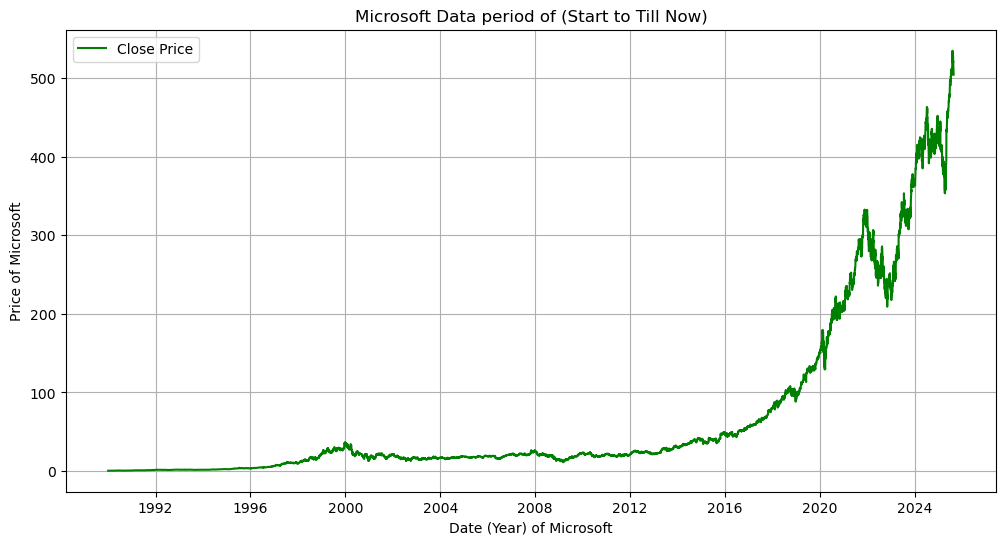

In [ ]:
# plotting the graphs of closing price of the microsoft data.
plt.figure(figsize = (12,6))   # Figsize showing the heights and width of the graphs
plt.plot(microsoft_data.index, microsoft_data["Close"], label = "Close Price", color = "Green")
plt.title("Microsoft Data period of (Start to Till Now)")
plt.xlabel("Date (Year) of Microsoft")
plt.ylabel("Price of Microsoft")
plt.legend()  # Label box in graphs
plt.grid(True)
plt.show()

## Steps:
1. Check the stationary
2. Make data stationary
3. Decompose the time series
4. Choose and fit forecasting model - ARIMA, SARIMA, PROPHET, LSTM
5. Evoluate mdel accuracy
6. Plot the visualization

* Data Preprocessing
1. Handling missing values
2. Making data stationary
3. handling outliers
4. Resampling

## 1. Handling missing values :

### Creating a full date range:

In [ ]:
complete_index = pd.date_range(start = "1990-01-01", end = "2025-07-25", freq = "D")

#Reindex the dataframe
microsoft_data = microsoft_data.reindex(complete_index)

print("Reindexed data frame with missing dates: \n", microsoft_data)

Reindexed data frame with missing dates: 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]


### Fill the missing values into the dataset.
 * Types:
    1. Imputation
           1. Mean Imputation
           2. Mode Imputation
           3. Median Imputation
           4. Forward Fill Impoutation
           5. Backward Fill Imputation
   2. Interpolation
          1. Polynomial Interpolation
          2. Spline Interpolation
          3. Linear Interpolation
   3. Preditive Model
          1. Linear Regression
          2. KNN
          3. Random Forest

### 1. Imputation :
Imputation means filling missing (NaN) values in your dataset using some logic, so that:
Your model doesn’t break or give errors
The data remains usable and meaningful

* We have total five types of imputation which can be helpful for filling the null values.
  1. Mean imputation
  2. Mode imputation
  3. Median imputation
  4. Forward fill imputation
  5. Backward fill imputaion

#### 1. Mean Imputation :

In [ ]:
mean_value = microsoft_data.mean()
microsoft_data_mean_imputed = microsoft_data.fillna(mean_value)

print("Original Data : \n ", microsoft_data)
print("\n ---------------------- \n Mean Imputation : \n", microsoft_data_mean_imputed)

Original Data : 
  Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]

 ---------------------- 
 Mean Imputation : 
 Price            Close        High         L

#### 2. Median Imputation :

In [ ]:
median_value = microsoft_data.median()
microsoft_data_median_imputed = microsoft_data.fillna(median_value)

print("Original Data : \n", microsoft_data)
print("\n ------------------------- \n Median Imputation : \n", microsoft_data_median_imputed)

Original Data : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]

 ------------------------- 
 Median Imputation : 
 Price            Close        High      

#### 3. Mode Imputation :

In [ ]:
mode_value = microsoft_data.mode()
microsoft_data_mode_imputed = microsoft_data.fillna(mode_value)

print("Original Data : \n", microsoft_data)
print("\n ------------------------- \n Mode Imputation : \n", microsoft_data_mode_imputed)

Original Data : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]

 ------------------------- 
 Mode Imputation : 
 Price            Close        High        

#### 4. Forward Fill :

In [ ]:
microsoft_data_ffill = microsoft_data.ffill()

print("Original Data : \n", microsoft_data)
print("\n ------------------------- \n Forward Fill Imputation : \n", microsoft_data_ffill)

Original Data : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]

 ------------------------- 
 Forward Fill Imputation : 
 Price            Close        High

#### 5. Backward Fill :

In [ ]:
microsoft_data_bfill = microsoft_data.bfill()

print("Original Data : \n", microsoft_data)
print("\n ------------------------- \n Backward Fill Imputation : \n", microsoft_data_bfill)

Original Data : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]

 ------------------------- 
 Backward Fill Imputation : 
 Price            Close        Hig

### 2. Interpolation :
        * Why we use Interpolation ?
            1. To fill missing value smoothly
            2. More accurate than imputation methods(Mean, Median, Mode, Forward fill, Backward fill)
            3. To avoid bias and distortion

        * Total 3 types of Interpolation
            1. Linear interpolation
            2. Spline interpolation
            3. polynomial interpolation

#### 1. Linear  Interpolation :

In [ ]:
microsoft_data_linear_interp = microsoft_data.interpolate(method = "linear")
print("\n Linear Interpolation : \n", microsoft_data_linear_interp)


 Linear Interpolation : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]


#### 2. Polynomial Interpolation :

In [ ]:
microsoft_data_polynomial_interp = microsoft_data.interpolate(method = "polynomial", order = 2) # Where order is a degree which is shown as curved of data.
print("\n Polynomial Interpolation : \n", microsoft_data_polynomial_interp)


 Polynomial Interpolation : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]


#### 3. Spline Interpolation :

In [ ]:
microsoft_data_spline_interp = microsoft_data.interpolate(method = "spline", order = 2)
print("\n Spline Interpolation : \n", microsoft_data_spline_interp)


 Spline Interpolation : 
 Price            Close        High         Low        Open       Volume
1990-01-01         NaN         NaN         NaN         NaN          NaN
1990-01-02    0.377187    0.377187    0.366031    0.370812   53035200.0
1990-01-03    0.379312    0.383562    0.376124    0.380375  113774400.0
1990-01-04    0.390469    0.391000    0.377187    0.379312  125740800.0
1990-01-05    0.380906    0.391000    0.380375    0.388875   69566400.0
...                ...         ...         ...         ...          ...
2025-07-21  509.222870  511.249567  504.720262  505.878362   14066800.0
2025-07-22  504.440735  510.361026  504.440735  510.131392   13868600.0
2025-07-23  505.039764  505.958268  499.878266  505.918325   16396600.0
2025-07-24  510.041534  512.826933  506.467393  507.934982   16107000.0
2025-07-25  512.866943  517.439383  509.522405  511.628927   19125700.0

[12990 rows x 5 columns]


In [ ]:
# After all Unterpolation and Imputation method we considering the linear interpolation methods becuase of it present the smoothen value between any time period.

microsoft_data = microsoft_data_linear_interp

In [ ]:
# Data with filled missing values by linear interpolation.
microsoft_data.head(20)

Price,Close,High,Low,Open,Volume
1990-01-01,NaN,NaN,NaN,NaN,NaN
1990-01-02,0.377187,0.377187,0.366031,0.370812,53035200.0
1990-01-03,0.379312,0.383562,0.376124,0.380375,113774400.0
1990-01-04,0.390469,0.391000,0.377187,0.379312,125740800.0
1990-01-05,0.380906,0.391000,0.380375,0.388875,69566400.0
1990-01-06,0.382854,0.389583,0.378958,0.386041,66038400.0
1990-01-07,0.384802,0.388166,0.377541,0.383208,62510400.0
1990-01-08,0.386749,0.386749,0.376125,0.380375,58982400.0
1990-01-09,0.385687,0.391000,0.383562,0.386749,70300800.0
1990-01-10,0.375062,0.387812,0.374531,0.382500,103766400.0


### Making a Data Stationary:

### ADF test (Augmented Dicky - fuller test):

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Drop NaN or Inf from the 'Close' column
close_prices = microsoft_data['Close'].replace([np.inf, -np.inf], np.nan).dropna()

# Step 2: Apply ADF test
result = adfuller(close_prices)

# Step 3: Print the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 4.439876433997792
p-value: 1.0


#### Make the series stationary with the differencing :
1. First-order differencing : Used to remove trend from the data.
2. Second-order differencing : Used if trend is still present after first differencing. It applies differencing twice.
3. Seasonal differencing : Used to remove seasonality from time series data (e.g., daily, monthly, yearly patterns).

#### First Order Differencing:

In [ ]:
microsoft_data_diff1 = microsoft_data.diff().dropna()

##### Re-run ADF Test to check that series is still Non-stationary or stationary.
* if  p-value > 0.05 then series is Non-stationary
* If p-value < 0.05 after differencing → data is now stationary

In [ ]:
result = adfuller(close_prices)

# Print the results.
print("ADF Statistics : ", result[0])
print("P - value : ",result[1])

ADF Statistics :  4.439876433997792
P - value :  1.0


In [ ]:
# So, basically after checking the first order differencing methods we got the same output result for the ADF test. So, we need to do second-order differencing method for making our data stationary.

#### Second Order Differencing:

In [ ]:
microsoft_data_diff2 = microsoft_data_diff1.diff().dropna()

##### Re-run ADF Test to check that series is still Non-stationary or stationary.
* if  p-value > 0.05 then series is Non-stationary
* If p-value < 0.05 after differencing → data is now stationary

In [ ]:
result = adfuller(close_prices)

# Print the results.
print("ADF Statistics : ", result[0])
print("P - Value : ", result[1])

ADF Statistics :  4.439876433997792
P - Value :  1.0


In [ ]:
# We need to log transformation before diffrencing because of our data is showing large variations.
# If your data has exponential growth or large variations, apply log() to compress it:
log_data = np.log(microsoft_data)
log_diff = log_data.diff().dropna()

# Then ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(log_diff["Close"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -41.89782897651945
p-value: 0.0


#### Now our data series is strong stationarity.
* ADF Statistic: -41.89
The more negative this value, the stronger the evidence of stationarity.

* p-value: 0.0
This is way below the threshold of 0.05.
So you reject the null hypothesis (that the data is non-stationary).
Which means: Data is now stationary

* Just remember.
"Stationary data = Stable pattern = Better model = Accurate forecast"

In [ ]:
# Drop any remaining NaN rows
microsoft_data = microsoft_data.dropna()

In [ ]:
print(microsoft_data['Close'].head())
print(microsoft_data['Close'].isna().sum())  # Check NaNs


1990-01-02    0.377187
1990-01-03    0.379312
1990-01-04    0.390469
1990-01-05    0.380906
1990-01-06    0.382854
Freq: D, Name: Close, dtype: float64
0


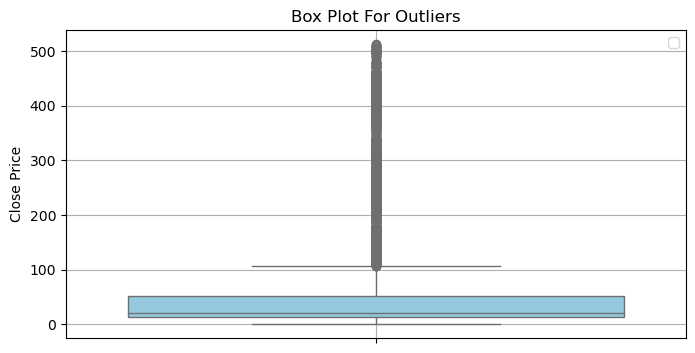

In [ ]:
# Plotting the Box Plot for finding the outliers.
plt.figure(figsize = (8,4))
sns.boxplot(data = microsoft_data, y = "Close", color = "skyblue")
plt.title("Box Plot For Outliers")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Calculate IQR for Close column
Q1 = microsoft_data['Close'].quantile(0.25)
Q3 = microsoft_data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mark outliers in a new column (True if it's an outlier)
microsoft_data['Outlier_Close'] = ~microsoft_data['Close'].between(lower_bound, upper_bound)

# Optional: Check how many outliers are there
print("Total outliers in Close:", microsoft_data['Outlier_Close'].sum())


Total outliers in Close: 2331


In [ ]:
microsoft_data.head()

Price,Close,High,Low,Open,Volume,Outlier_Close
1990-01-02,0.377187,0.377187,0.366031,0.370812,53035200.0,False
1990-01-03,0.379312,0.383562,0.376124,0.380375,113774400.0,False
1990-01-04,0.390469,0.391000,0.377187,0.379312,125740800.0,False
1990-01-05,0.380906,0.391000,0.380375,0.388875,69566400.0,False
1990-01-06,0.382854,0.389583,0.378958,0.386041,66038400.0,False


In [ ]:
microsoft_data.tail()

Price,Close,High,Low,Open,Volume,Outlier_Close
2025-07-21,509.222870,511.249567,504.720262,505.878362,14066800.0,True
2025-07-22,504.440735,510.361026,504.440735,510.131392,13868600.0,True
2025-07-23,505.039764,505.958268,499.878266,505.918325,16396600.0,True
2025-07-24,510.041534,512.826933,506.467393,507.934982,16107000.0,True
2025-07-25,512.866943,517.439383,509.522405,511.628927,19125700.0,True


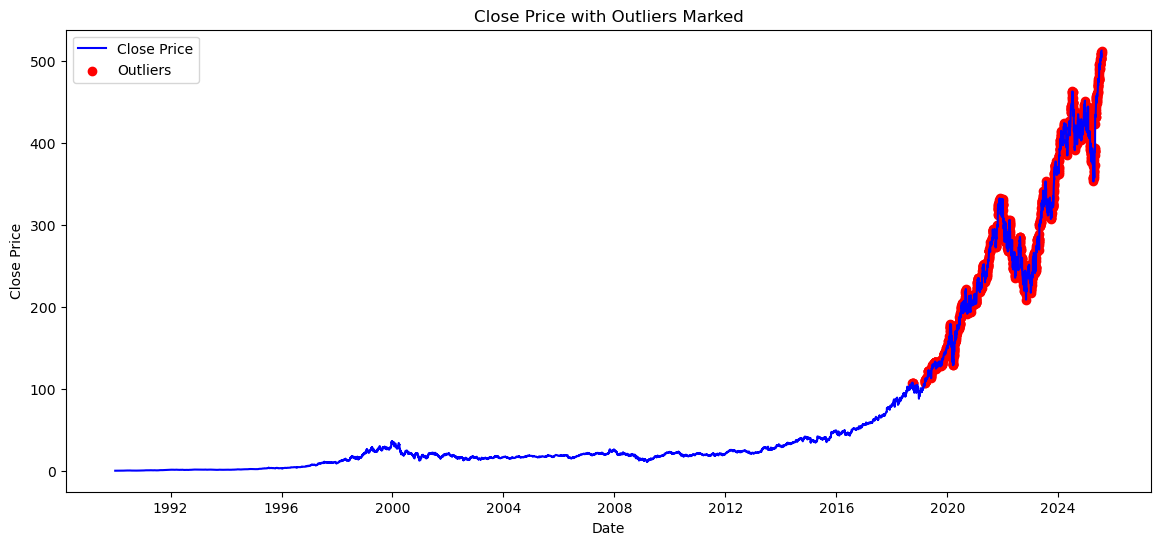

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(microsoft_data.index, microsoft_data['Close'], label='Close Price', color='blue')

# Mark outliers in red
outliers = microsoft_data[microsoft_data['Outlier_Close']]
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers')

plt.title('Close Price with Outliers Marked')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


#### Split the data set into trainning part and testing part.

### MODEL BUILDING : (ARIMA, SARIMA, PROPHET, LSTM)

In [ ]:
microsoft_data = microsoft_data.reset_index()

In [ ]:
microsoft_data = microsoft_data.rename(columns = {"index" : "ds", "Close" : "y"})

In [ ]:
# Convert 'ds' to datetime
microsoft_data['ds'] = pd.to_datetime(microsoft_data['ds'])

In [ ]:
# Set 'ds' as the datetime index
microsoft_data = microsoft_data.set_index('ds')

In [ ]:
microsoft_data.head()

Price,y,High,Low,Open,Volume,Outlier_Close
ds,,,,,,
1990-01-02,0.377187,0.377187,0.366031,0.370812,53035200.0,False
1990-01-03,0.379312,0.383562,0.376124,0.380375,113774400.0,False
1990-01-04,0.390469,0.391000,0.377187,0.379312,125740800.0,False
1990-01-05,0.380906,0.391000,0.380375,0.388875,69566400.0,False
1990-01-06,0.382854,0.389583,0.378958,0.386041,66038400.0,False


In [ ]:
# Keep only the 'y' column for modeling
microsoft_data = microsoft_data[['y']]

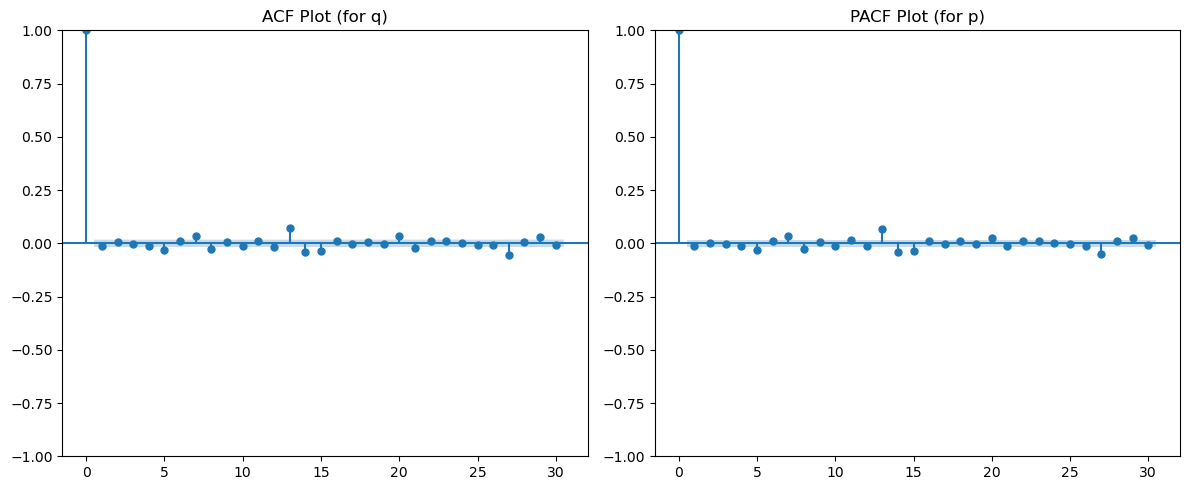

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Step 1: Differencing (if d=1, as per ADF test)
y_diff = microsoft_data['y'].diff().dropna()

# Step 2: Plot ACF & PACF graphs (visual interpretation)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(y_diff, lags=30, ax=plt.gca(), title='ACF Plot (for q)')

plt.subplot(1,2,2)
plot_pacf(y_diff, lags=30, ax=plt.gca(), title='PACF Plot (for p)')

plt.tight_layout()
plt.show()


#### ARIMA (AUTO REGRESSIVE INTEGRATED MOVING AVERAGE):

===== Evaluation on Test Data =====
MAE OF ARIMA  : 24.4428
MSE OF ARIMA  : 1119.1235
RMSE OF ARIMA : 33.4533


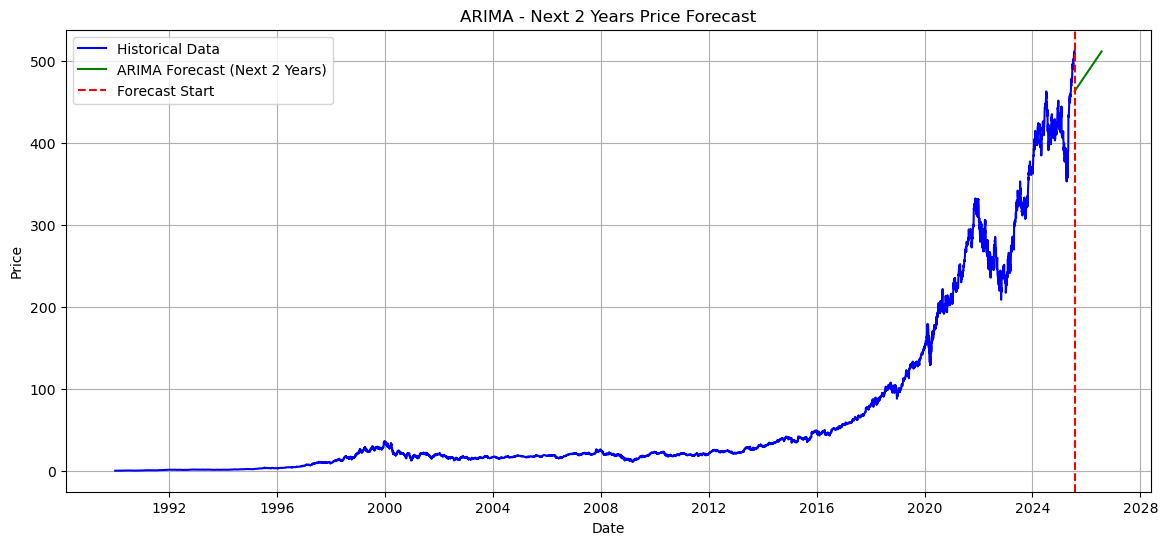

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Train-Test Split (last 1 year as test set)
train_data = microsoft_data[:-365]
test_data = microsoft_data[-365:]

# Fit ARIMA model on train data
# (p,d,q) values adjust according to AIC/BIC or PACF/ACF analysis
model = ARIMA(train_data, order=(1,2,1))
model_fit = model.fit()

# Make 2 years forecast (730 days)
forecast_test = model_fit.forecast(steps=len(test_data))

# Evaluation Metrics
mae_arima = mean_absolute_error(test_data, forecast_test)
mse_arima = mean_squared_error(test_data, forecast_test)
rmse_arima = np.sqrt(mean_squared_error(test_data, forecast_test))

print("===== Evaluation on Test Data =====")
print(f"MAE OF ARIMA  : {mae_arima:.4f}")
print(f"MSE OF ARIMA  : {mse_arima:.4f}")
print(f"RMSE OF ARIMA : {rmse_arima:.4f}")


# Forecast Next 2 Years (730 days)
# -------------------------
forecast_steps = 730
forecast_result = model_fit.forecast(steps=forecast_steps)

# Create future dates index
last_date = microsoft_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_result}, index=future_dates)

# Plot
plt.figure(figsize=(14,6))
plt.plot(microsoft_data.index, microsoft_data, label='Historical Data', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='ARIMA Forecast (Next 2 Years)', color='green')
plt.axvline(x=microsoft_data.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title("ARIMA - Next 2 Years Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

#### SARIMA (SEASONAL AUTO REGRESSIVE INTEGRATED MOVING AVERAGE):

===== SARIMA Evaluation on Test Data =====
MAE OF SARIMA  : 24.4802
MSE OF SARIMA  : 1097.1186
RMSE OF SARIMA : 33.1228


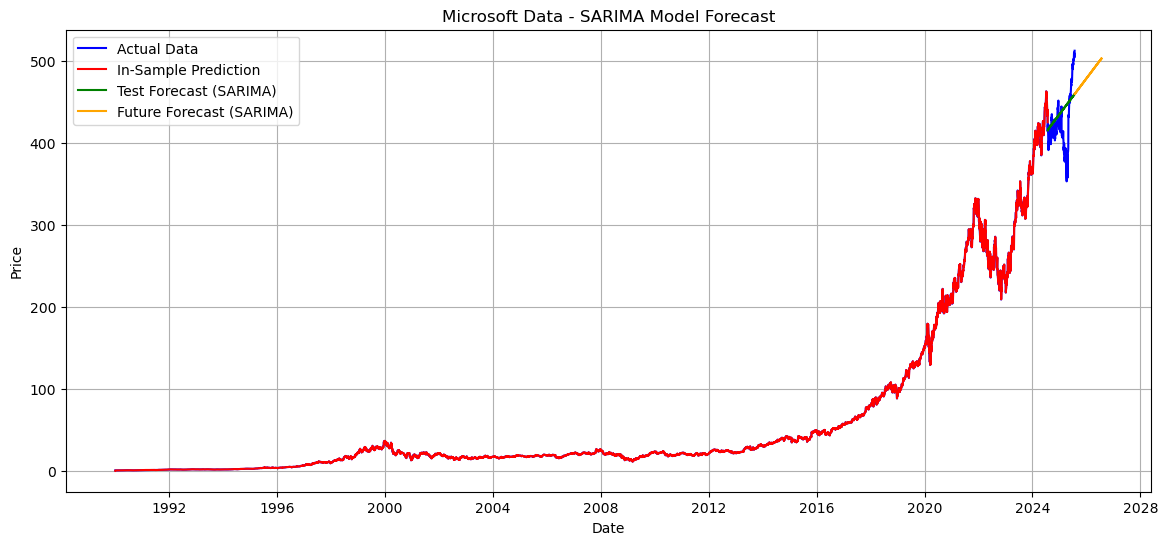

In [ ]:
# 1. Train-Test Split (last 1 year as test set)
train_data = microsoft_data[:-365]
test_data = microsoft_data[-365:]

# 2. Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 2, 1, 12))
model_fit = model.fit()

# 3. In-sample predictions
predictions = model_fit.predict(start=train_data.index[0], end=test_data.index[-1])

# 4. Out-of-sample forecast for test period
sarima_forecast = model_fit.forecast(steps=len(test_data))

# 5. Future forecast (730 days = ~2 years)
forecast_steps = 730
future_forecast = model_fit.forecast(steps=forecast_steps)

# 6. Create future date index
last_date = microsoft_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# 7. Convert forecast to DataFrame
future_df = pd.DataFrame({'Forecast': future_forecast}, index=future_dates)

# 6. Evaluation on Test Data
# ==============================
mae_sarima = mean_absolute_error(test_data, sarima_forecast)
mse_sarima = mean_squared_error(test_data, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test_data, sarima_forecast))

print("===== SARIMA Evaluation on Test Data =====")
print(f"MAE OF SARIMA  : {mae_sarima:.4f}")
print(f"MSE OF SARIMA  : {mse_sarima:.4f}")
print(f"RMSE OF SARIMA : {rmse_sarima:.4f}")

# 8. Plot actual vs predicted vs future
plt.figure(figsize=(14, 6))
plt.plot(microsoft_data.index, microsoft_data, label="Actual Data", color='blue')
plt.plot(train_data.index, predictions[:len(train_data)], color="red", label="In-Sample Prediction")
plt.plot(test_data.index, sarima_forecast, label='Test Forecast (SARIMA)', color='green')
plt.plot(future_df.index, future_df['Forecast'], label='Future Forecast (SARIMA)', color='orange')
plt.title("Microsoft Data - SARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


#### PROPHET FORECASTING BY FACEBOOK.

07:00:26 - cmdstanpy - INFO - Chain [1] start processing
07:00:28 - cmdstanpy - INFO - Chain [1] done processing


===== Prophet Evaluation on Test Data =====
MAE OF PROPHET  : 30.8967
MSE OF PROPHET  : 1273.9472
RMSE OF PROPHET : 35.6924


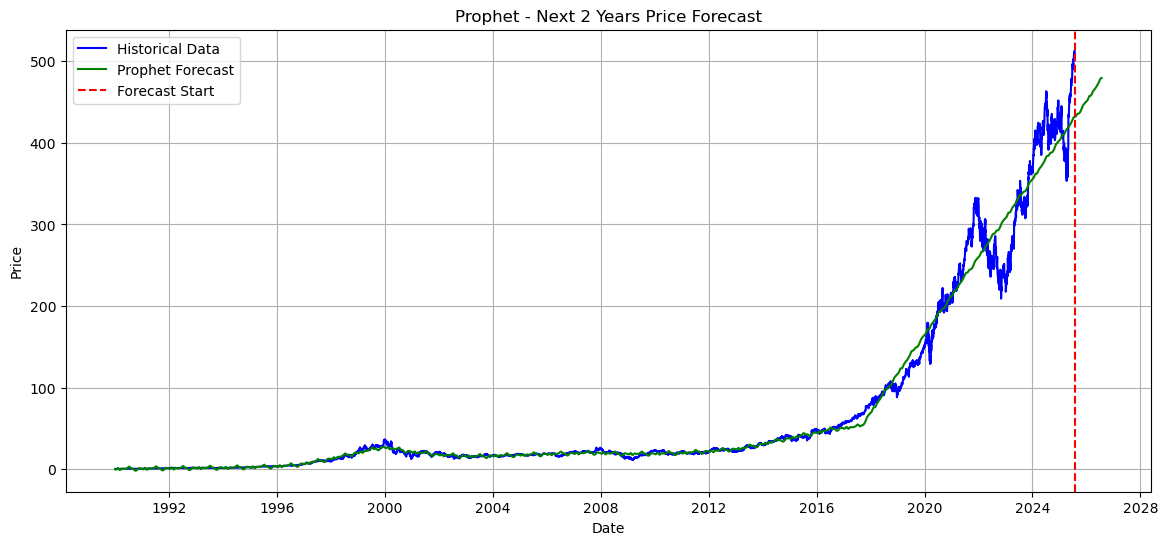

In [ ]:
# Step 1: Reset index to make 'ds' a column
microsoft_data = microsoft_data.reset_index()

# Step 2: Rename columns for Prophet
microsoft_data = microsoft_data.rename(columns={'Date': 'ds', 'Price': 'y'})

# Step 3: Train-Test Split (last 1 year as test set)
train_data = microsoft_data[:-365]
test_data = microsoft_data[-365:]

# Step 4: Fit Prophet model on train data
model = Prophet()
model.fit(train_data)

# Step 5: Forecast till the end of test set
future = model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = model.predict(future)

# Extract only test period forecast
prophet_forecast_test = forecast.iloc[-len(test_data):][['ds', 'yhat']]

# Step 6: Evaluation on Test Data
mae_prophet = mean_absolute_error(test_data['y'], prophet_forecast_test['yhat'])
mse_prophet = mean_squared_error(test_data['y'], prophet_forecast_test['yhat'])
rmse_prophet = np.sqrt(mse_prophet)

print("===== Prophet Evaluation on Test Data =====")
print(f"MAE OF PROPHET  : {mae_prophet:.4f}")
print(f"MSE OF PROPHET  : {mse_prophet:.4f}")
print(f"RMSE OF PROPHET : {rmse_prophet:.4f}")

# Step 7: Make 2 years (730 days) future forecast from last date in dataset
future_full = model.make_future_dataframe(periods=730, freq='D')
forecast_full = model.predict(future_full)

# Step 8: Plot full forecast including 2 years ahead
plt.figure(figsize=(14,6))
plt.plot(microsoft_data['ds'], microsoft_data['y'], label='Historical Data', color='blue')
plt.plot(forecast_full['ds'], forecast_full['yhat'], label='Prophet Forecast', color='green')
plt.axvline(x=microsoft_data['ds'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title("Prophet - Next 2 Years Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()



#### LSTM (LONG SHORT TERM MEMORY):
* It's a form of a RNN.
* RNN works for train the sequencial data.
* LSTM is used to solve problem of vanishing the gradient problem.

Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 2.8916e-05
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 6.5569e-06
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 5.4560e-06
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 5.2374e-06
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 4.8006e-06
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 5.2401e-06
Epoch 7/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 4.4351e-06
Epoch 8/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 4.8228e-06
Epoch 9/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 4.6507e-06
Epoch 10/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 4.1018e-06
Epoch 11/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 3.9646e-06
Epoch 12/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 4.0890e-06
Epoch 13/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 4.3997e-06
Epoch 14/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss

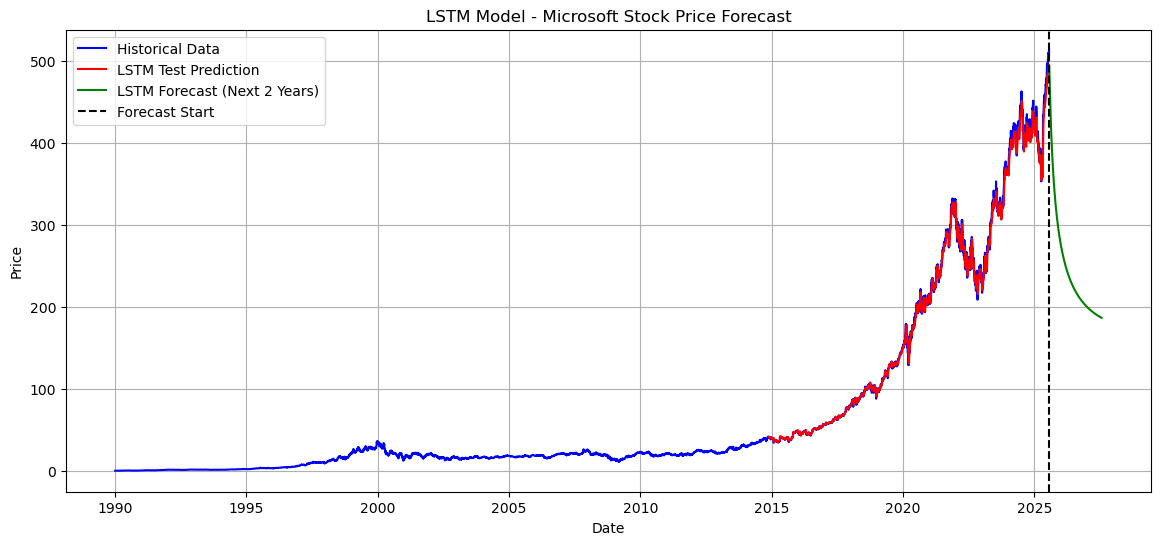

In [ ]:
# Preprocessing
microsoft_data["ds"] = pd.to_datetime(microsoft_data["ds"])
microsoft_data.rename(columns={"ds": "Date", "y": "Close"}, inplace=True)
microsoft_data.set_index("Date", inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(microsoft_data[["Close"]])

# Train/Test split
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

# Create sequence function
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, 60)
X_test, y_test = create_sequences(test_data, 60)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # Sample, Time step, features
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential() # Model sequential to add layer one by one
model.add(LSTM(50, return_sequences=True, input_shape=(60,1))) # layer/ nuerons = 50
model.add(Dropout(0.2)) # To remove the overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1)) # Give next one prediction

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions on test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Forecast Next 2 Years (730 days)
forecast_steps = 730
last_sequence = scaled_data[-60:].copy()
forecast_scaled = []

for _ in range(forecast_steps):
    seq_input = last_sequence.reshape(1, 60, 1)
    pred = model.predict(seq_input, verbose=0)
    forecast_scaled.append(pred[0,0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)

forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1,1))

# Create future date index
last_date = microsoft_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=730)

# ===== EVALUATION on Test Set =====
mae_LSTM = mean_absolute_error(y_test_actual, predictions)
mse_LSTM = mean_squared_error(y_test_actual, predictions)
rmse_LSTM = np.sqrt(mse_LSTM)

print("===== LSTM Evaluation on Test Data =====")
print(f"MAE OF LSTM  : {mae_LSTM:.4f}")
print(f"MSE OF LSTM  : {mse_LSTM:.4f}")
print(f"RMSE OF LSTM : {rmse_LSTM:.4f}")

# Plot historical + test predictions + forecast
plt.figure(figsize=(14,6))
plt.plot(microsoft_data.index, microsoft_data["Close"], label='Historical Data', color='blue')
plt.plot(microsoft_data.index[train_size:], predictions, label='LSTM Test Prediction', color='red')
plt.plot(future_dates, forecast, label='LSTM Forecast (Next 2 Years)', color='green')
plt.axvline(x=last_date, color='black', linestyle='--', label='Forecast Start')
plt.title('LSTM Model - Microsoft Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
